# Лабораторная работа 3

## Цель работы:
изучение методов классификации данных, реализованные в библиотеке Scikit-Learn, а также ознакомление с нейронными сетями с использованием библиотек TensorFlow и TensorBoard.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

filename = 'data/data.csv'
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
data = pd.read_csv(filename, usecols=cols, on_bad_lines='skip')

data.dropna(inplace=True)

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


## Датасет

В датасете представлены данные о качестве вина. Независимая переменная quality - диапазон целых чисел [3 4 5 6 7 8].

In [14]:
from sklearn.metrics import roc_curve, auc

results = {}

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

classes = np.unique(y)
n_classes = len(classes)
print(classes)
print(f'Уникальных значений y - {n_classes}')

X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def get_stats(y_test, y_pred, model, X_test):
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, average='weighted', zero_division=0),
        'ROC-AUC': np.nan
    }

    y_bin = label_binarize(y_test, classes=classes)
    y_score = model.predict_proba(X_test)
    metrics['ROC-AUC'] = roc_auc_score(y_bin, y_score, average='weighted', multi_class='ovo')

    print(f'accuracy = {metrics['Accuracy']}')
    print(f'precision = {metrics['Precision']}')
    print(f'recall = {metrics['Recall']}')
    print(f'f1 = {metrics['F1-Score']}')
    print(f'roc_auc = {metrics['ROC-AUC']}')

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (One-vs-Rest)')
    plt.legend()
    plt.show()

    return metrics

[3 4 5 6 7 8]
Уникальных значений y - 6


GaussianNB
accuracy = 0.5851528384279476
precision = 0.6108889967114131
recall = 0.5851528384279476
f1 = 0.5940315636828915
roc_auc = 0.7630749640388964


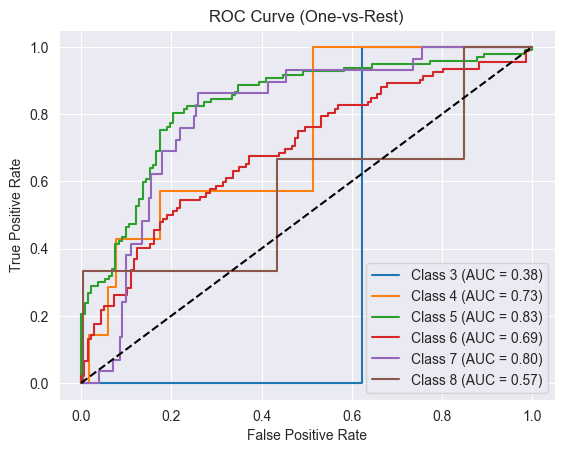

In [15]:
print("GaussianNB")
model = GaussianNB()
model.fit(X_train_def, y_train_def)
y_pred = model.predict(X_test_def)
results['GaussianNB'] = get_stats(y_test_def, y_pred, model, X_test_def)

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Decision Tree
accuracy = 0.6331877729257642
precision = 0.6224029897054232
recall = 0.6331877729257642
f1 = 0.6267769686267789
roc_auc = 0.7120495502386889


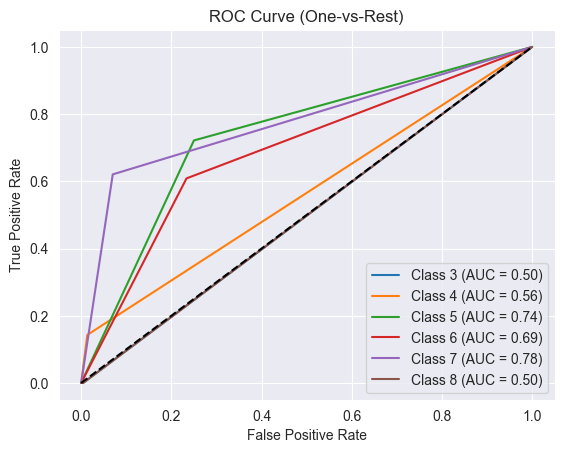

In [17]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree")
results['Decision Tree'] = get_stats(y_test, y_pred_tree, tree, X_test)

Linear Discriminant Analysis
accuracy = 0.6157205240174672
precision = 0.5994989362893293
recall = 0.6157205240174672
f1 = 0.6060613960763868
roc_auc = 0.7835892557623311


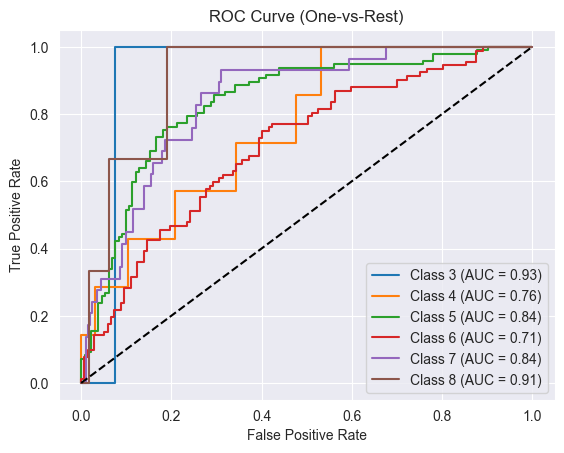

In [18]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
print("Linear Discriminant Analysis")
results['Linear Discriminant Analysis'] = get_stats(y_test, y_pred_lda, lda, X_test)

Support Vector Machine
accuracy = 0.6637554585152838
precision = 0.6323648179569832
recall = 0.6637554585152838
f1 = 0.638181887458663
roc_auc = 0.8190301035495674


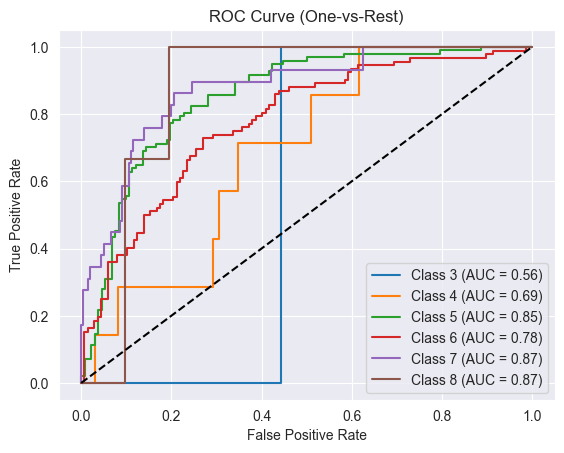

In [19]:
svm = SVC(kernel='rbf', random_state=42, probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine")
results['Support Vector Machine'] = get_stats(y_test, y_pred_svm, svm, X_test)

k-Nearest Neighbor
accuracy = 0.5676855895196506
precision = 0.5452857652907088
recall = 0.5676855895196506
f1 = 0.5550775152784339
roc_auc = 0.7230565245684292


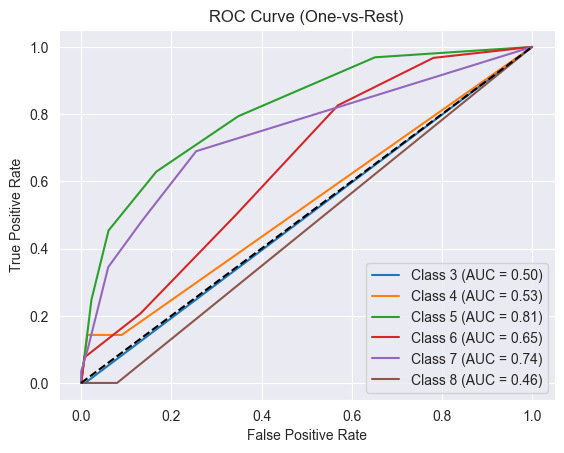

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("k-Nearest Neighbor")
results['k-Nearest Neighbor'] = get_stats(y_test, y_pred_knn, knn, X_test)

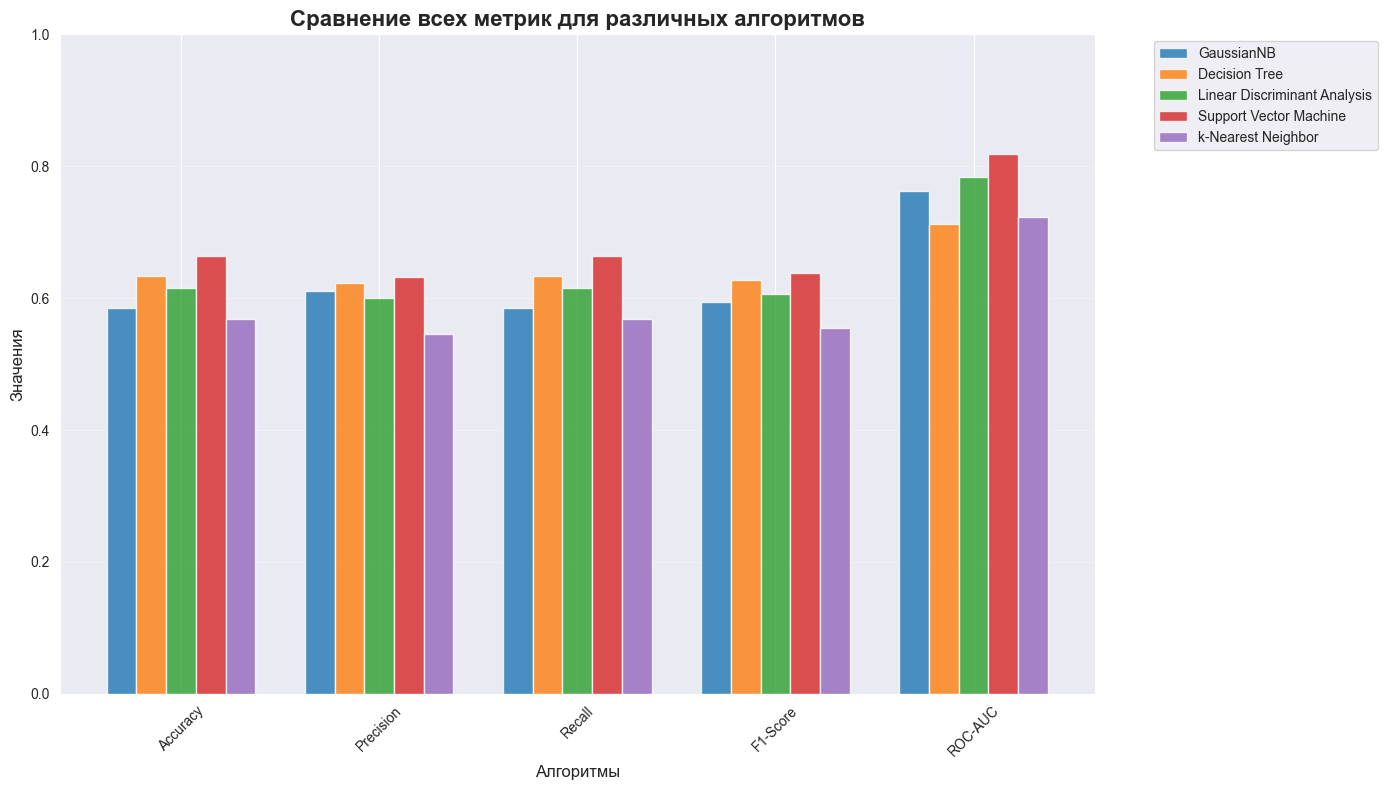

In [21]:
df_results = pd.DataFrame(results).T

models = ['GaussianNB', 'Decision Tree', 'Linear Discriminant Analysis',
          'Support Vector Machine', 'k-Nearest Neighbor']
plt.figure(figsize=(14, 8))

x = np.arange(len(df_results.columns))
width = 0.15

for i, metric in enumerate(df_results.index):
    offset = width * (i - 2)
    plt.bar(x + offset, df_results.loc[metric], width, label=metric, alpha=0.8)

plt.xlabel('Алгоритмы', fontsize=12)
plt.ylabel('Значения', fontsize=12)
plt.title('Сравнение всех метрик для различных алгоритмов', fontsize=16, fontweight='bold')
plt.xticks(x, df_results.columns, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
# metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
# x = np.arange(len(df_results.columns))  # позиции по оси X
# width = 0.15  # ширина столбца
#
# plt.figure(figsize=(10, 6))
#
# # Добавляем каждый столбец рядом
# for i, metric in enumerate(metrics):
#     plt.bar(x + i * width, df_results[metric], width, label=metric)
#
# # Настройка внешнего вида
# plt.xticks(x + width * 2, df_results.columns, rotation=25, ha='right')
# plt.ylabel("Score")
# plt.title("Comparison of Models by Metrics")
# plt.legend(df_results.columns, name='Model')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

In [22]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

pipe_gnb = Pipeline([('scaler', StandardScaler()), ('clf', GaussianNB())])
grid_gnb = {
    'clf__var_smoothing': np.logspace(-12, -6, 7)
}

pipe_tree = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state=42))])
grid_tree = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 5, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

pipe_lda = Pipeline([('scaler', StandardScaler()), ('clf', LinearDiscriminantAnalysis())])
grid_lda = {
    'clf__solver': ['svd', 'lsqr', 'eigen'],
    'clf__shrinkage': [None, 'auto', 0.0, 0.1, 0.5]
}

pipe_svm = Pipeline([('scaler', StandardScaler()), ('clf', SVC(probability=True, random_state=42))])
grid_svm = {
    'clf__C': loguniform(1e-3, 1e3),
    'clf__kernel': ['rbf', 'poly', 'linear'],
    'clf__gamma': ['scale', 'auto'],
    'clf__degree': [2, 3, 4]
}

pipe_knn = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])
grid_knn = {
    'clf__n_neighbors': [3, 5, 7, 9, 11],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 2]
}

models_and_grids = {
    'GaussianNB': (pipe_gnb, grid_gnb, GridSearchCV),
    'DecisionTree': (pipe_tree, grid_tree, GridSearchCV),
    'LDA': (pipe_lda, grid_lda, GridSearchCV),
    'SVM': (pipe_svm, grid_svm, RandomizedSearchCV),
    'kNN': (pipe_knn, grid_knn, GridSearchCV)
}

def run_search(name, pipeline, param_grid, searcher, X, y):
    print(f'{name}')
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    if searcher is GridSearchCV:
        search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring='f1_weighted',
            cv=cv,
            n_jobs=-1,
            refit=True,
            verbose=0
        )
    else:
        search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=param_grid,
            n_iter=40,
            scoring='f1_weighted',
            cv=cv,
            n_jobs=-1,
            refit=True,
            random_state=42,
            verbose=0
        )

    search.fit(X, y)
    print('Best score:', search.best_score_)
    print('Best params:', search.best_params_, '\n')
    results = pd.DataFrame(search.cv_results_)
    return search, results

all_searches = {}
all_results = {}

for name, (pipe, grid, searcher) in models_and_grids.items():
    try:
        search_obj, cv_results = run_search(name, pipe, grid, searcher, X_train, y_train)
        all_searches[name] = search_obj
        all_results[name] = cv_results
    except Exception as e:
        print(f'Ошибка при обработке {name}: {e}')


GaussianNB
Best score: 0.5371867487016119
Best params: {'clf__var_smoothing': np.float64(1e-12)} 

DecisionTree
Best score: 0.578878585982864
Best params: {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2} 

LDA
Best score: 0.5813968111639645
Best params: {'clf__shrinkage': 0.1, 'clf__solver': 'lsqr'} 

SVM
Best score: 0.5931830862737267
Best params: {'clf__C': np.float64(4.0428727350273315), 'clf__degree': 4, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'} 

kNN
Best score: 0.606463475272152
Best params: {'clf__n_neighbors': 11, 'clf__p': 1, 'clf__weights': 'distance'} 



## Влияние гиперпараметров

### GaussianNB
Default f1 = 0.594 -> GridSearch = 0.537, Значение 1e-12 слишком маленькое — модель становится слишком чувствительной к дисперсии данных.

### DecisionTree
Default f1 = 0.627 -> GridSearch = 0.579, Значения фактически дефолтные, так что GridSearch ничего не улучшил - либо GridSearch перебирал слишком узкий диапазон, либо кросс-валидация могла случайно разделить данные неудачно

### LDA
Default f1 = 0.606 -> GridSearch = 0.581, LDA с lsqr и shrinkage иногда работает хуже, если признаки уже масштабированы или классы не сбалансированы

### SVM
Default f1 = 0.638 -> GridSearch = 0.593, gamma='auto' вычисляется как 1 / n_features, что часто слишком большое значение, приводящее к переобучению, degree=4 не используется для rbf, но наличие этого параметра в сетке может сбить GridSearch, C=4 — довольно высокое, может сделать границу слишком гибкой

### kNN
Default f1 = 0.555 -> GridSearch = 0.606, n_neighbors=5 (изначальное) могло быть слишком маленьким - появлялся шум, p=1 может лучше работать на данных с разными масштабами, weights='distance' помогает дать больший вес ближайшим точкам и уменьшает ошибку



In [23]:
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)



In [24]:
tf.random.set_seed(42)
import datetime
log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=True
)

n_features = X_train.shape[1]
n_classes = len(np.unique(y))

model = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(n_classes, activation='softmax' if n_classes > 2 else 'sigmoid')
])

if n_classes > 2:
    loss_fn = "sparse_categorical_crossentropy"
    metrics = ["accuracy"]
else:
    loss_fn = "binary_crossentropy"
    metrics = ["accuracy", keras.metrics.AUC(name="AUC")]

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=loss_fn,
    metrics=metrics
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[tensorboard_callback],
)

model.summary()

y_pred_proba = model.predict(X_test)
if n_classes > 2:
    y_pred = np.argmax(y_pred_proba, axis=1)
else:
    y_pred = (y_pred_proba > 0.5).astype(int).ravel()

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
roc = roc_auc_score(y_test, y_pred_proba if n_classes == 2 else pd.get_dummies(y_test), multi_class='ovr')

print("Метрики нейронной сети")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")
print("\nОтчёт классификации:")
print(classification_report(y_test, y_pred, zero_division=0))

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.2640 - loss: 1.6997 - val_accuracy: 0.5191 - val_loss: 1.4181
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4966 - loss: 1.3645 - val_accuracy: 0.5082 - val_loss: 1.2266
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5486 - loss: 1.2000 - val_accuracy: 0.5246 - val_loss: 1.1403
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5390 - loss: 1.1366 - val_accuracy: 0.5137 - val_loss: 1.0921
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5349 - loss: 1.1109 - val_accuracy: 0.5464 - val_loss: 1.0613
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5636 - loss: 1.0642 - val_accuracy: 0.5355 - val_loss: 1.0376
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5732 - loss: 1.0162 - val_accuracy: 0.5574 - val_loss: 1.0236
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5800 - loss: 1.0255 - val_accuracy: 0.5628 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,140 (35.71 KB)

 Trainable params: 3,046 (11.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,094 (23.81 KB)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Метрики нейронной сети
Accuracy: 0.6594
Precision: 0.6249
Recall: 0.6594
F1-score: 0.6391
ROC-AUC: 1.0000

Отчёт классификации:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         7
           2       0.74      0.77      0.76        97
           3       0.61      0.71      0.65        92
           4       0.52      0.38      0.44        29
           5       0.00      0.00      0.00         3

    accuracy                           0.66       229
   macro avg       0.31      0.31      0.31       229
weighted avg       0.62      0.66      0.64       229



![Tensorboard](img/tb.png "Tensorboard")
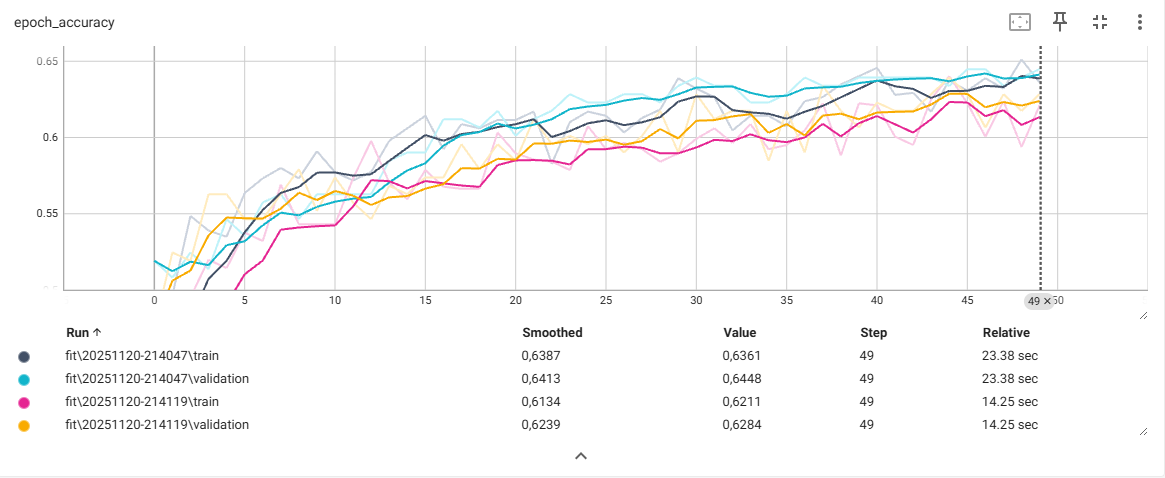

![Нейросеть 1](img/1.png "Нейросеть 1")


![Нейросеть 2](img/2.png "Нейросеть 2")

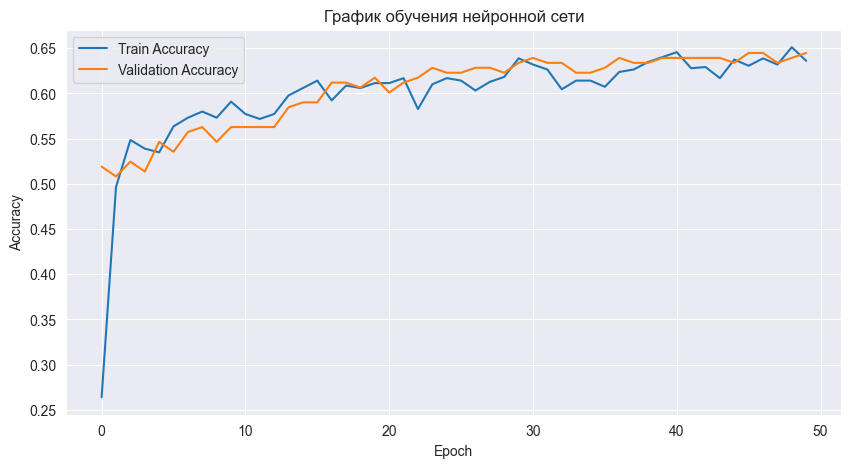

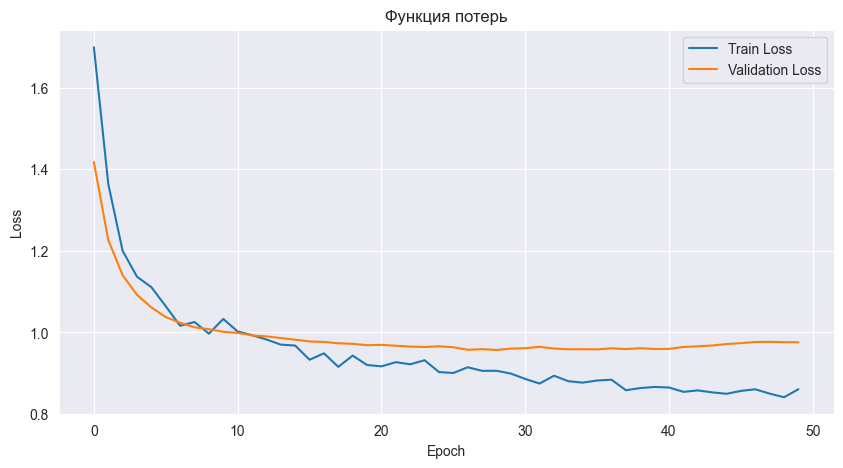

In [25]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('График обучения нейронной сети')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Функция потерь')
plt.legend()
plt.show()

In [26]:
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(n_features,)))

    # количество слоёв и нейронов
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Choice(f'units_{i}', [32, 64, 128]),
            activation='relu'
        ))
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))

    model.add(layers.Dense(n_classes, activation='softmax' if n_classes > 2 else 'sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])
        ),
        loss='sparse_categorical_crossentropy' if n_classes > 2 else 'binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='tuner_dir',
    project_name='nn_tuning'
)

tuner.search(X_train, y_train, epochs=30, validation_split=0.2, verbose=1)
best_model = tuner.get_best_models(1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]

print("Лучшие гиперпараметры:")
for param in best_hps.values.keys():
    print(param, ":", best_hps.get(param))

Reloading Tuner from tuner_dir\nn_tuning\tuner0.json

Лучшие гиперпараметры:
num_layers : 3
units_0 : 64
dropout_0 : 0.4
lr : 0.01
units_1 : 32
dropout_1 : 0.1
units_2 : 32
dropout_2 : 0.1


In [27]:
log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=True
)

model = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(n_classes, activation='softmax' if n_classes > 2 else 'sigmoid')
])

if n_classes > 2:
    loss_fn = "sparse_categorical_crossentropy"
    metrics = ["accuracy"]
else:
    loss_fn = "binary_crossentropy"
    metrics = ["accuracy", keras.metrics.AUC(name="AUC")]

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=loss_fn,
    metrics=metrics
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[tensorboard_callback],
)

model.summary()

y_pred_proba = model.predict(X_test)
if n_classes > 2:
    y_pred = np.argmax(y_pred_proba, axis=1)
else:
    y_pred = (y_pred_proba > 0.5).astype(int).ravel()

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
roc = roc_auc_score(y_test, y_pred_proba if n_classes == 2 else pd.get_dummies(y_test), multi_class='ovr')

print("Метрики нейронной сети")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")
print("\nОтчёт классификации:")
print(classification_report(y_test, y_pred, zero_division=0))

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2818 - loss: 1.7668 - val_accuracy: 0.4754 - val_loss: 1.6058
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4172 - loss: 1.4948 - val_accuracy: 0.5246 - val_loss: 1.3673
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4952 - loss: 1.2705 - val_accuracy: 0.5191 - val_loss: 1.1932
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5198 - loss: 1.1765 - val_accuracy: 0.5628 - val_loss: 1.1142
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5144 - loss: 1.1531 - val_accuracy: 0.5628 - val_loss: 1.0713
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5376 - loss: 1.0991 - val_accuracy: 0.5464 - val_loss: 1.0403
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5321 - loss: 1.1003 - val_accuracy: 0.5464 - val_loss: 1.0181
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5691 - loss: 1.0564 - val_accuracy: 0.5628 - v

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,308 (48.08 KB)

 Trainable params: 4,102 (16.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,206 (32.06 KB)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Метрики нейронной сети
Accuracy: 0.6419
Precision: 0.6091
Recall: 0.6419
F1-score: 0.6247
ROC-AUC: 1.0000

Отчёт классификации:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         7
           2       0.73      0.78      0.76        97
           3       0.61      0.65      0.63        92
           4       0.42      0.38      0.40        29
           5       0.00      0.00      0.00         3

    accuracy                           0.64       229
   macro avg       0.29      0.30      0.30       229
weighted avg       0.61      0.64      0.62       229



## Оптимальные параметры

### Слои
В результате подбора параметров увеличилось количество слоев (2 -> 3). Модель стала более глубокая, то есть способна захватывать более сложные зависимости в данных.

### Нейроны
Оставлен первый слой с 64 нейронами (оптимально — баланс между вычислительной мощностью и обобщающей способностью).

Второй и третий — по 32 нейрона.
Это создаёт сужающуюся архитектуру (“bottleneck”), что помогает модели обобщать и избегать запоминания данных.

### Dropout
Было 0.3 и 0.2 -> стало 0.4 / 0.1 / 0.1.

На первом слое — усиленное регуляризующее воздействие (0.4), на последующих — мягкое подавление переобучения (0.1).

Это говорит о том, что переобучение происходило в первых слоях, и более сильный dropout помог его снизить, сохранив обучаемость на глубоких слоях.

### Learning rate

Увеличение learning rate (c 0.001 до 0.01) означает, что оптимизатор делает более крупные шаги по поверхности потерь. Таким образом, модель за 50 эпох могла не успеть достигнуть оптимального состояния.